In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from dataclasses import dataclass
import os
import random
# from numba import njit, jit
import shutil
from sklearn.utils import shuffle

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
import scipy.stats as st
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [111]:
## AUC graphs by different races are drawn.
## CSV files by different races are read.
resnet50_simple_black = pd.read_csv("Resnet50_simple_comp_EMBED_Black.csv")
resnet50_simple_white = pd.read_csv("Resnet50_simple_comp_EMBED_White.csv")
resnet50_simple_asian = pd.read_csv("Resnet50_simple_comp_EMBED_Asian.csv")
resnet50_simple_unknown = pd.read_csv("Resnet50_simple_comp_EMBED_Unknown.csv")

resnet50_combined_black = pd.read_csv("Resnet50_combined_comp_EMBED_Black.csv")
resnet50_combined_white = pd.read_csv("Resnet50_combined_comp_EMBED_White.csv")
resnet50_combined_asian = pd.read_csv("Resnet50_combined_comp_EMBED_Asian.csv")
resnet50_combined_unknown = pd.read_csv("Resnet50_combined_comp_EMBED_Unknown.csv")


resnet101_simple_black = pd.read_csv("Resnet101_simple_comp_EMBED_Black.csv")
resnet101_simple_white = pd.read_csv("Resnet101_simple_comp_EMBED_White.csv")
resnet101_simple_asian = pd.read_csv("Resnet101_simple_comp_EMBED_Asian.csv")
resnet101_simple_unknown = pd.read_csv("Resnet101_simple_comp_EMBED_Unknown.csv")

resnet101_combined_black = pd.read_csv("Resnet101_combined_comp_EMBED_Black.csv")
resnet101_combined_white = pd.read_csv("Resnet101_combined_comp_EMBED_White.csv")
resnet101_combined_asian = pd.read_csv("Resnet101_combined_comp_EMBED_Asian.csv")
resnet101_combined_unknown = pd.read_csv("Resnet101_combined_comp_EMBED_Unknown.csv")

resnet152_simple_black = pd.read_csv("Resnet152_simple_comp_EMBED_Black.csv")
resnet152_simple_white = pd.read_csv("Resnet152_simple_comp_EMBED_White.csv")
resnet152_simple_asian = pd.read_csv("Resnet152_simple_comp_EMBED_Asian.csv")
resnet152_simple_unknown = pd.read_csv("Resnet152_simple_comp_EMBED_Unknown.csv")

resnet152_combined_black = pd.read_csv("Resnet152_combined_comp_EMBED_Black.csv")
resnet152_combined_white = pd.read_csv("Resnet152_combined_comp_EMBED_White.csv")
resnet152_combined_asian = pd.read_csv("Resnet152_combined_comp_EMBED_Asian.csv")
resnet152_combined_unknown = pd.read_csv("Resnet152_combined_comp_EMBED_Unknown.csv")

In [112]:
resnet50_simple_black.head()

,predicted_probabilty,predicted_classes,true_classes
0,0.828832,1.0,0.0
1,0.999971,1.0,1.0
2,0.984262,1.0,0.0
3,0.549585,1.0,0.0
4,0.601147,1.0,0.0


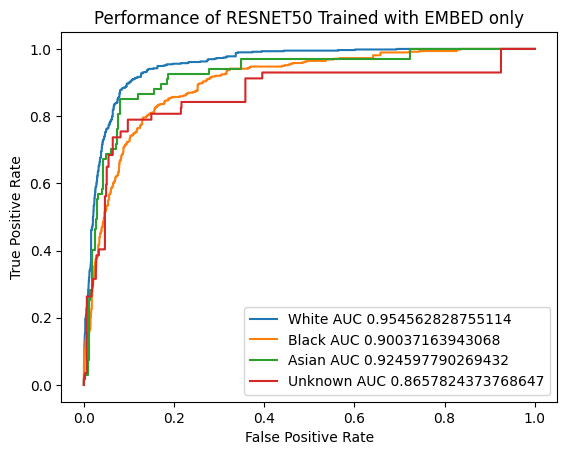

In [114]:
## ROC curves are drawn with scikit learn library.
true_class_black = resnet50_simple_black['true_classes']
predicted_black = resnet50_simple_black['predicted_probabilty']

true_class_white = resnet50_simple_white['true_classes']
predicted_white = resnet50_simple_white['predicted_probabilty']

true_class_asian = resnet50_simple_asian['true_classes']
predicted_asian = resnet50_simple_asian['predicted_probabilty']

true_class_unknown = resnet50_simple_unknown['true_classes']
predicted_unknown = resnet50_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[0, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[0, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[0, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[0, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[0, 0].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[0, 0].set_title("Performance of RESNET50 Trained with EMBED only")

plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET50 Trained with EMBED only")
plt.legend()
plt.show()

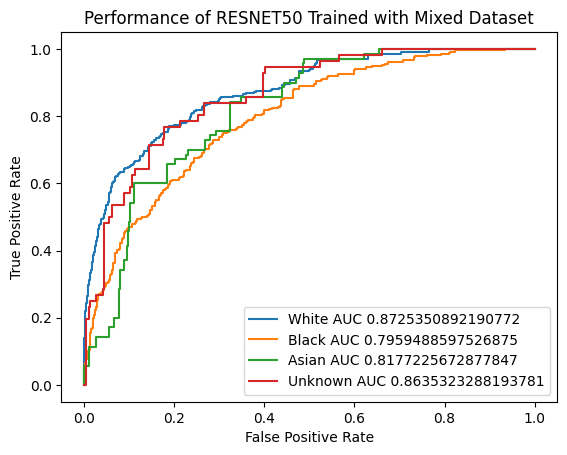

In [115]:
true_class_black = resnet50_combined_black['true_classes']
predicted_black = resnet50_combined_black['predicted_probabilty']

true_class_white = resnet50_combined_white['true_classes']
predicted_white = resnet50_combined_white['predicted_probabilty']

true_class_asian = resnet50_combined_asian['true_classes']
predicted_asian = resnet50_combined_asian['predicted_probabilty']

true_class_unknown = resnet50_combined_unknown['true_classes']
predicted_unknown = resnet50_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[0, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[0, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[0, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[0, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[0, 1].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[0, 1].set_title("Performance of RESNET50 Trained with Mixed Dataset")


plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET50 Trained with Mixed Dataset")
plt.legend()
plt.show()

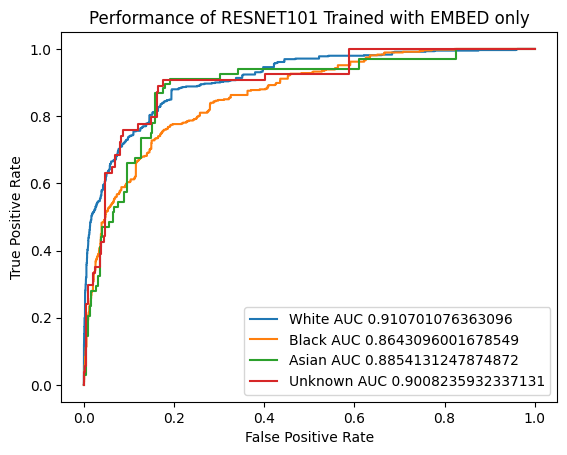

In [116]:
true_class_black = resnet101_simple_black['true_classes']
predicted_black = resnet101_simple_black['predicted_probabilty']

true_class_white = resnet101_simple_white['true_classes']
predicted_white = resnet101_simple_white['predicted_probabilty']

true_class_asian = resnet101_simple_asian['true_classes']
predicted_asian = resnet101_simple_asian['predicted_probabilty']

true_class_unknown = resnet101_simple_unknown['true_classes']
predicted_unknown = resnet101_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[1, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[1, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[1, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[1, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[1, 0].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[1, 0].set_title("Performance of RESNET101 Trained with EMBED only")

plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET101 Trained with EMBED only")
plt.legend()
plt.show()

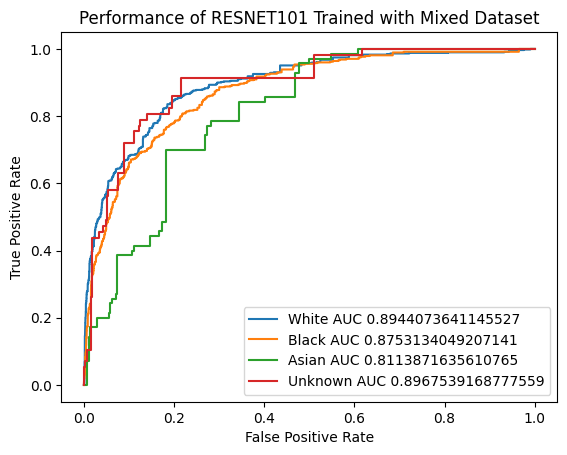

In [117]:
true_class_black = resnet101_combined_black['true_classes']
predicted_black = resnet101_combined_black['predicted_probabilty']

true_class_white = resnet101_combined_white['true_classes']
predicted_white = resnet101_combined_white['predicted_probabilty']

true_class_asian = resnet101_combined_asian['true_classes']
predicted_asian = resnet101_combined_asian['predicted_probabilty']

true_class_unknown = resnet101_combined_unknown['true_classes']
predicted_unknown = resnet101_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)


axs[1, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[1, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[1, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[1, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[1, 1].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[1, 1].set_title("Performance of RESNET101 Trained with Mixed Dataset")


plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET101 Trained with Mixed Dataset")
plt.legend()
plt.show()

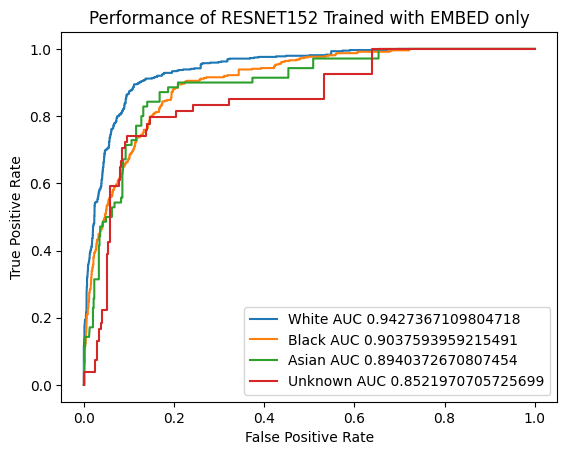

In [118]:
true_class_black = resnet152_simple_black['true_classes']
predicted_black = resnet152_simple_black['predicted_probabilty']

true_class_white = resnet152_simple_white['true_classes']
predicted_white = resnet152_simple_white['predicted_probabilty']

true_class_asian = resnet152_simple_asian['true_classes']
predicted_asian = resnet152_simple_asian['predicted_probabilty']

true_class_unknown = resnet152_simple_unknown['true_classes']
predicted_unknown = resnet152_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[2, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[2, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[2, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[2, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[2, 0].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[2, 0].set_title("Performance of RESNET152 Trained with EMBED only")

plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET152 Trained with EMBED only")
plt.legend()
plt.show()

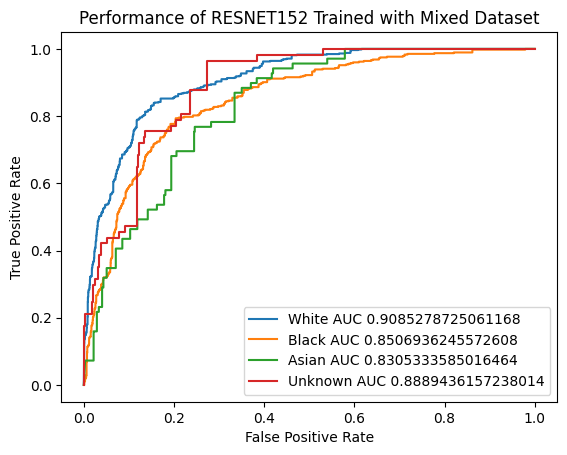

In [119]:
true_class_black = resnet152_combined_black['true_classes']
predicted_black = resnet152_combined_black['predicted_probabilty']

true_class_white = resnet152_combined_white['true_classes']
predicted_white = resnet152_combined_white['predicted_probabilty']

true_class_asian = resnet152_combined_asian['true_classes']
predicted_asian = resnet152_combined_asian['predicted_probabilty']

true_class_unknown = resnet152_combined_unknown['true_classes']
predicted_unknown = resnet152_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)


axs[2, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[2, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[2, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[2, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[2, 1].set(xlabel='True Positive Rate""', ylabel='False Positive Rate')
axs[2, 1].set_title("Performance of RESNET152 Trained with Mixed Dataset")


plt.plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
plt.plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
plt.plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
plt.plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Performance of RESNET152 Trained with Mixed Dataset")
plt.legend()
plt.show()

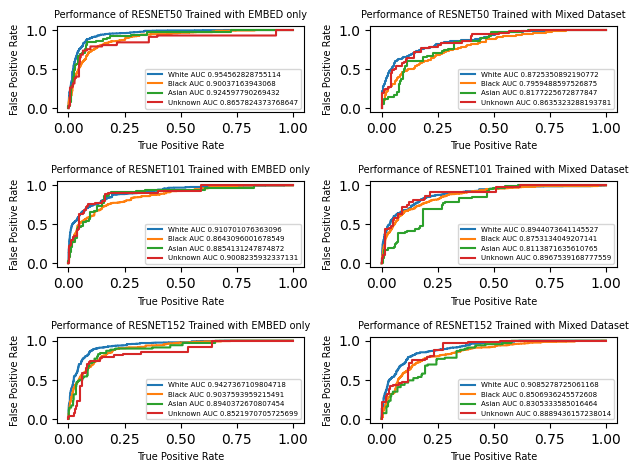

In [120]:
fig, axs = plt.subplots(3, 2)
true_class_black = resnet50_simple_black['true_classes']
predicted_black = resnet50_simple_black['predicted_probabilty']

true_class_white = resnet50_simple_white['true_classes']
predicted_white = resnet50_simple_white['predicted_probabilty']

true_class_asian = resnet50_simple_asian['true_classes']
predicted_asian = resnet50_simple_asian['predicted_probabilty']

true_class_unknown = resnet50_simple_unknown['true_classes']
predicted_unknown = resnet50_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[0, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[0, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[0, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[0, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[0, 0].legend(loc='best',prop={'size': 5})
axs[0, 0].set_xlabel('True Positive Rate', fontsize = 7)
axs[0, 0].set_ylabel('False Positive Rate', fontsize = 7)
# axs[0, 0].set(xlabel='True Positive Rate', ylabel='False Positive Rate')
axs[0, 0].set_title("Performance of RESNET50 Trained with EMBED only",size=7)

true_class_black = resnet50_combined_black['true_classes']
predicted_black = resnet50_combined_black['predicted_probabilty']

true_class_white = resnet50_combined_white['true_classes']
predicted_white = resnet50_combined_white['predicted_probabilty']

true_class_asian = resnet50_combined_asian['true_classes']
predicted_asian = resnet50_combined_asian['predicted_probabilty']

true_class_unknown = resnet50_combined_unknown['true_classes']
predicted_unknown = resnet50_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[0, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[0, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[0, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[0, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[0, 1].legend(loc='best',prop={'size': 5})
axs[0, 1].set_xlabel('True Positive Rate', fontsize = 7)
axs[0, 1].set_ylabel('False Positive Rate', fontsize = 7)
# axs[0, 1].set(xlabel='True Positive Rate', ylabel='False Positive Rate')
axs[0, 1].set_title("Performance of RESNET50 Trained with Mixed Dataset",size=7)

true_class_black = resnet101_simple_black['true_classes']
predicted_black = resnet101_simple_black['predicted_probabilty']

true_class_white = resnet101_simple_white['true_classes']
predicted_white = resnet101_simple_white['predicted_probabilty']

true_class_asian = resnet101_simple_asian['true_classes']
predicted_asian = resnet101_simple_asian['predicted_probabilty']

true_class_unknown = resnet101_simple_unknown['true_classes']
predicted_unknown = resnet101_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[1, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[1, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[1, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[1, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[1, 0].legend(loc='best',prop={'size': 5})
axs[1, 0].set_xlabel('True Positive Rate', fontsize = 7)
axs[1, 0].set_ylabel('False Positive Rate', fontsize = 7)
# axs[1, 0].set(xlabel='True Positive Rate', ylabel='False Positive Rate')
axs[1, 0].set_title("Performance of RESNET101 Trained with EMBED only",size=7)


true_class_black = resnet101_combined_black['true_classes']
predicted_black = resnet101_combined_black['predicted_probabilty']

true_class_white = resnet101_combined_white['true_classes']
predicted_white = resnet101_combined_white['predicted_probabilty']

true_class_asian = resnet101_combined_asian['true_classes']
predicted_asian = resnet101_combined_asian['predicted_probabilty']

true_class_unknown = resnet101_combined_unknown['true_classes']
predicted_unknown = resnet101_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)


axs[1, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[1, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[1, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[1, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[1, 1].legend(loc='best',prop={'size': 5})
axs[1, 1].set_xlabel('True Positive Rate', fontsize = 7)
axs[1, 1].set_ylabel('False Positive Rate', fontsize = 7)
axs[1, 1].set_title("Performance of RESNET101 Trained with Mixed Dataset",size=7)


true_class_black = resnet152_simple_black['true_classes']
predicted_black = resnet152_simple_black['predicted_probabilty']

true_class_white = resnet152_simple_white['true_classes']
predicted_white = resnet152_simple_white['predicted_probabilty']

true_class_asian = resnet152_simple_asian['true_classes']
predicted_asian = resnet152_simple_asian['predicted_probabilty']

true_class_unknown = resnet152_simple_unknown['true_classes']
predicted_unknown = resnet152_simple_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)

axs[2, 0].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[2, 0].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[2, 0].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[2, 0].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[2, 0].legend(loc='best',prop={'size': 5})
axs[2, 0].set_xlabel('True Positive Rate', fontsize = 7)
axs[2, 0].set_ylabel('False Positive Rate', fontsize = 7)
# axs[2, 0].set(xlabel='True Positive Rate', ylabel='False Positive Rate')
axs[2, 0].set_title("Performance of RESNET152 Trained with EMBED only",size=7)



true_class_black = resnet152_combined_black['true_classes']
predicted_black = resnet152_combined_black['predicted_probabilty']

true_class_white = resnet152_combined_white['true_classes']
predicted_white = resnet152_combined_white['predicted_probabilty']

true_class_asian = resnet152_combined_asian['true_classes']
predicted_asian = resnet152_combined_asian['predicted_probabilty']

true_class_unknown = resnet152_combined_unknown['true_classes']
predicted_unknown = resnet152_combined_unknown['predicted_probabilty']

# print(auc)

fprblack, tprblack, thresholdsblack = metrics.roc_curve(true_class_black,  predicted_black)
fprwhite, tprwhite, thresholdswhite = metrics.roc_curve(true_class_white,  predicted_white)
fprasian, tprasian, thresholdsasian = metrics.roc_curve(true_class_asian,  predicted_asian)
fprunknown, tprunknown, thresholdsunknown = metrics.roc_curve(true_class_unknown,  predicted_unknown)


axs[2, 1].plot(fprwhite, tprwhite,label = "White AUC "+str(metrics.roc_auc_score(true_class_white,  predicted_white)))
axs[2, 1].plot(fprblack,tprblack,label = "Black AUC "+str(metrics.roc_auc_score(true_class_black, predicted_black)))
axs[2, 1].plot(fprasian, tprasian,label = "Asian AUC "+str(metrics.roc_auc_score(true_class_asian,  predicted_asian)))
axs[2, 1].plot(fprunknown, tprunknown,label = "Unknown AUC "+str(metrics.roc_auc_score(true_class_unknown,  predicted_unknown)))
axs[2, 1].legend(loc='best',prop={'size': 5})
axs[2, 1].set_xlabel('True Positive Rate', fontsize = 7)
axs[2, 1].set_ylabel('False Positive Rate', fontsize = 7)
# axs[2, 1].set(xlabel='True Positive Rate', ylabel='False Positive Rate')
axs[2, 1].set_title("Performance of RESNET152 Trained with Mixed Dataset", size=7)

fig.tight_layout(pad=1.0)
